In [1]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import array_to_img
import requests
from io import BytesIO
import io
import csv
from urllib.request import urlopen
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

Using TensorFlow backend.


In [2]:
df = pd.read_csv('aws_data.csv')
df.head()

,Unnamed: 0,Location,Identifier
0,1,https://sathyabucket1.s3.us-east-2.amazonaws.c...,A
1,2,https://sathyabucket1.s3.us-east-2.amazonaws.c...,A
2,3,https://sathyabucket1.s3.us-east-2.amazonaws.c...,A
3,4,https://sathyabucket1.s3.us-east-2.amazonaws.c...,A
4,5,https://sathyabucket1.s3.us-east-2.amazonaws.c...,A


In [96]:
def fetch_input(url):
    response = requests.get(url)
    img = load_img(BytesIO(response.content), target_size = (30,30,3),color_mode = "grayscale")
    return img_to_array(img)
   #return img

In [97]:
links = []
for index, row in df.iterrows():
    arr = fetch_input(row['Location'])
    links.append(arr)

In [ ]:
#print(links)

In [109]:
df['X']= links


In [111]:
print(df)

      Unnamed: 0                                           Location  \
0              1  https://sathyabucket1.s3.us-east-2.amazonaws.c...   
1              2  https://sathyabucket1.s3.us-east-2.amazonaws.c...   
2              3  https://sathyabucket1.s3.us-east-2.amazonaws.c...   
3              4  https://sathyabucket1.s3.us-east-2.amazonaws.c...   
4              5  https://sathyabucket1.s3.us-east-2.amazonaws.c...   
...          ...                                                ...   
4653        4654  https://sathyabucket1.s3.us-east-2.amazonaws.c...   
4654        4655  https://sathyabucket1.s3.us-east-2.amazonaws.c...   
4655        4656  https://sathyabucket1.s3.us-east-2.amazonaws.c...   
4656        4657  https://sathyabucket1.s3.us-east-2.amazonaws.c...   
4657        4658  https://sathyabucket1.s3.us-east-2.amazonaws.c...   

                                                      X  
0     [[[205.0], [205.0], [203.0], [203.0], [205.0],...  
1     [[[205.0], [205.0], [203.

In [8]:
#df.to_csv('numpyx.csv')

In [10]:
data = df.values
#print(data)

In [24]:
new_df = df.drop(columns=['Unnamed: 0', 'Location'])
new_df.head()

,Identifier,X
0,A,"[[[205.0], [205.0], [203.0], [203.0], [205.0],..."
1,A,"[[[205.0], [205.0], [203.0], [203.0], [205.0],..."
2,A,"[[[206.0], [205.0], [205.0], [205.0], [206.0],..."
3,A,"[[[205.0], [206.0], [209.0], [208.0], [206.0],..."
4,A,"[[[206.0], [206.0], [209.0], [207.0], [208.0],..."


In [26]:
new_df.to_csv('numpyz.csv')

In [55]:
dfd = pd.read_csv('numpyz.csv')
dfd.head()

,Unnamed: 0,Identifier,X
0,0,A,[[[205.]\n [205.]\n [203.]\n [203.]\n [205...
1,1,A,[[[205.]\n [205.]\n [203.]\n [203.]\n [205...
2,2,A,[[[206.]\n [205.]\n [205.]\n [205.]\n [206...
3,3,A,[[[205.]\n [206.]\n [209.]\n [208.]\n [206...
4,4,A,[[[206.]\n [206.]\n [209.]\n [207.]\n [208...


In [56]:
data = dfd.values
X = data[:, 0:2]
y = data[:, 1]

In [ ]:
#print(data)

In [85]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y)
encoded_y = label_encoder.transform(y)

In [59]:
for label, original_class in zip(encoded_y, y):
    print('Original Class: ' + str(original_class))
    print('Encoded Label: ' + str(label))
    print('-' * 12)

Original Class: A
Encoded Label: 0
------------
Original Class: A
Encoded Label: 0
------------
Original Class: A
Encoded Label: 0
------------
Original Class: A
Encoded Label: 0
------------
Original Class: A
Encoded Label: 0
------------
Original Class: A
Encoded Label: 0
------------
Original Class: A
Encoded Label: 0
------------
Original Class: A
Encoded Label: 0
------------
Original Class: A
Encoded Label: 0
------------
Original Class: A
Encoded Label: 0
------------
Original Class: A
Encoded Label: 0
------------
Original Class: A
Encoded Label: 0
------------
Original Class: A
Encoded Label: 0
------------
Original Class: A
Encoded Label: 0
------------
Original Class: A
Encoded Label: 0
------------
Original Class: A
Encoded Label: 0
------------
Original Class: A
Encoded Label: 0
------------
Original Class: A
Encoded Label: 0
------------
Original Class: A
Encoded Label: 0
------------
Original Class: A
Encoded Label: 0
------------
Original Class: A
Encoded Label: 0
-----

------------
Original Class: D
Encoded Label: 3
------------
Original Class: D
Encoded Label: 3
------------
Original Class: D
Encoded Label: 3
------------
Original Class: D
Encoded Label: 3
------------
Original Class: D
Encoded Label: 3
------------
Original Class: D
Encoded Label: 3
------------
Original Class: D
Encoded Label: 3
------------
Original Class: D
Encoded Label: 3
------------
Original Class: D
Encoded Label: 3
------------
Original Class: D
Encoded Label: 3
------------
Original Class: D
Encoded Label: 3
------------
Original Class: D
Encoded Label: 3
------------
Original Class: D
Encoded Label: 3
------------
Original Class: D
Encoded Label: 3
------------
Original Class: D
Encoded Label: 3
------------
Original Class: D
Encoded Label: 3
------------
Original Class: D
Encoded Label: 3
------------
Original Class: D
Encoded Label: 3
------------
Original Class: D
Encoded Label: 3
------------
Original Class: E
Encoded Label: 4
------------
Original Class: E
Encoded L

Encoded Label: 6
------------
Original Class: G
Encoded Label: 6
------------
Original Class: G
Encoded Label: 6
------------
Original Class: G
Encoded Label: 6
------------
Original Class: G
Encoded Label: 6
------------
Original Class: G
Encoded Label: 6
------------
Original Class: G
Encoded Label: 6
------------
Original Class: G
Encoded Label: 6
------------
Original Class: G
Encoded Label: 6
------------
Original Class: G
Encoded Label: 6
------------
Original Class: G
Encoded Label: 6
------------
Original Class: G
Encoded Label: 6
------------
Original Class: G
Encoded Label: 6
------------
Original Class: G
Encoded Label: 6
------------
Original Class: G
Encoded Label: 6
------------
Original Class: G
Encoded Label: 6
------------
Original Class: G
Encoded Label: 6
------------
Original Class: G
Encoded Label: 6
------------
Original Class: G
Encoded Label: 6
------------
Original Class: G
Encoded Label: 6
------------
Original Class: G
Encoded Label: 6
------------
Original C

------------
Original Class: K
Encoded Label: 10
------------
Original Class: K
Encoded Label: 10
------------
Original Class: K
Encoded Label: 10
------------
Original Class: K
Encoded Label: 10
------------
Original Class: K
Encoded Label: 10
------------
Original Class: K
Encoded Label: 10
------------
Original Class: K
Encoded Label: 10
------------
Original Class: K
Encoded Label: 10
------------
Original Class: K
Encoded Label: 10
------------
Original Class: K
Encoded Label: 10
------------
Original Class: K
Encoded Label: 10
------------
Original Class: K
Encoded Label: 10
------------
Original Class: K
Encoded Label: 10
------------
Original Class: K
Encoded Label: 10
------------
Original Class: K
Encoded Label: 10
------------
Original Class: K
Encoded Label: 10
------------
Original Class: K
Encoded Label: 10
------------
Original Class: K
Encoded Label: 10
------------
Original Class: K
Encoded Label: 10
------------
Original Class: K
Encoded Label: 10
------------
Origina

Encoded Label: 12
------------
Original Class: M
Encoded Label: 12
------------
Original Class: M
Encoded Label: 12
------------
Original Class: M
Encoded Label: 12
------------
Original Class: M
Encoded Label: 12
------------
Original Class: M
Encoded Label: 12
------------
Original Class: M
Encoded Label: 12
------------
Original Class: M
Encoded Label: 12
------------
Original Class: M
Encoded Label: 12
------------
Original Class: M
Encoded Label: 12
------------
Original Class: M
Encoded Label: 12
------------
Original Class: M
Encoded Label: 12
------------
Original Class: M
Encoded Label: 12
------------
Original Class: M
Encoded Label: 12
------------
Original Class: M
Encoded Label: 12
------------
Original Class: M
Encoded Label: 12
------------
Original Class: M
Encoded Label: 12
------------
Original Class: M
Encoded Label: 12
------------
Original Class: M
Encoded Label: 12
------------
Original Class: M
Encoded Label: 12
------------
Original Class: M
Encoded Label: 12
--

------------
Original Class: P
Encoded Label: 15
------------
Original Class: P
Encoded Label: 15
------------
Original Class: P
Encoded Label: 15
------------
Original Class: P
Encoded Label: 15
------------
Original Class: P
Encoded Label: 15
------------
Original Class: P
Encoded Label: 15
------------
Original Class: P
Encoded Label: 15
------------
Original Class: P
Encoded Label: 15
------------
Original Class: P
Encoded Label: 15
------------
Original Class: P
Encoded Label: 15
------------
Original Class: P
Encoded Label: 15
------------
Original Class: P
Encoded Label: 15
------------
Original Class: P
Encoded Label: 15
------------
Original Class: P
Encoded Label: 15
------------
Original Class: P
Encoded Label: 15
------------
Original Class: P
Encoded Label: 15
------------
Original Class: P
Encoded Label: 15
------------
Original Class: P
Encoded Label: 15
------------
Original Class: P
Encoded Label: 15
------------
Original Class: P
Encoded Label: 15
------------
Origina

Encoded Label: 17
------------
Original Class: R
Encoded Label: 17
------------
Original Class: R
Encoded Label: 17
------------
Original Class: S
Encoded Label: 18
------------
Original Class: S
Encoded Label: 18
------------
Original Class: S
Encoded Label: 18
------------
Original Class: S
Encoded Label: 18
------------
Original Class: S
Encoded Label: 18
------------
Original Class: S
Encoded Label: 18
------------
Original Class: S
Encoded Label: 18
------------
Original Class: S
Encoded Label: 18
------------
Original Class: S
Encoded Label: 18
------------
Original Class: S
Encoded Label: 18
------------
Original Class: S
Encoded Label: 18
------------
Original Class: S
Encoded Label: 18
------------
Original Class: S
Encoded Label: 18
------------
Original Class: S
Encoded Label: 18
------------
Original Class: S
Encoded Label: 18
------------
Original Class: S
Encoded Label: 18
------------
Original Class: S
Encoded Label: 18
------------
Original Class: S
Encoded Label: 18
--

Original Class: V
Encoded Label: 21
------------
Original Class: V
Encoded Label: 21
------------
Original Class: V
Encoded Label: 21
------------
Original Class: V
Encoded Label: 21
------------
Original Class: V
Encoded Label: 21
------------
Original Class: V
Encoded Label: 21
------------
Original Class: V
Encoded Label: 21
------------
Original Class: V
Encoded Label: 21
------------
Original Class: V
Encoded Label: 21
------------
Original Class: V
Encoded Label: 21
------------
Original Class: V
Encoded Label: 21
------------
Original Class: V
Encoded Label: 21
------------
Original Class: V
Encoded Label: 21
------------
Original Class: V
Encoded Label: 21
------------
Original Class: V
Encoded Label: 21
------------
Original Class: V
Encoded Label: 21
------------
Original Class: V
Encoded Label: 21
------------
Original Class: V
Encoded Label: 21
------------
Original Class: V
Encoded Label: 21
------------
Original Class: V
Encoded Label: 21
------------
Original Class: V
En

------------
Original Class: X
Encoded Label: 23
------------
Original Class: X
Encoded Label: 23
------------
Original Class: X
Encoded Label: 23
------------
Original Class: X
Encoded Label: 23
------------
Original Class: X
Encoded Label: 23
------------
Original Class: X
Encoded Label: 23
------------
Original Class: X
Encoded Label: 23
------------
Original Class: X
Encoded Label: 23
------------
Original Class: X
Encoded Label: 23
------------
Original Class: X
Encoded Label: 23
------------
Original Class: X
Encoded Label: 23
------------
Original Class: X
Encoded Label: 23
------------
Original Class: X
Encoded Label: 23
------------
Original Class: X
Encoded Label: 23
------------
Original Class: X
Encoded Label: 23
------------
Original Class: X
Encoded Label: 23
------------
Original Class: X
Encoded Label: 23
------------
Original Class: X
Encoded Label: 23
------------
Original Class: X
Encoded Label: 23
------------
Original Class: X
Encoded Label: 23
------------
Origina

Original Class: Y
Encoded Label: 24
------------
Original Class: Y
Encoded Label: 24
------------
Original Class: Y
Encoded Label: 24
------------
Original Class: Y
Encoded Label: 24
------------
Original Class: Y
Encoded Label: 24
------------
Original Class: Y
Encoded Label: 24
------------
Original Class: Y
Encoded Label: 24
------------
Original Class: Y
Encoded Label: 24
------------
Original Class: Y
Encoded Label: 24
------------
Original Class: Y
Encoded Label: 24
------------
Original Class: Y
Encoded Label: 24
------------
Original Class: Y
Encoded Label: 24
------------
Original Class: Y
Encoded Label: 24
------------
Original Class: Y
Encoded Label: 24
------------
Original Class: Y
Encoded Label: 24
------------
Original Class: Y
Encoded Label: 24
------------
Original Class: Y
Encoded Label: 24
------------
Original Class: Z
Encoded Label: 25
------------
Original Class: Z
Encoded Label: 25
------------
Original Class: Z
Encoded Label: 25
------------
Original Class: Z
En

In [68]:
from keras.utils import to_categorical

one_hot_y = to_categorical(encoded_y)
one_hot_y

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [69]:
one_hot_y.shape

(4658, 26)

In [ ]:
#dfd.head()

In [ ]:
#test = dfd.join(pd.DataFrame(one_hot_y))
test.head()

In [ ]:
#test.to_csv('testhot.csv')

In [106]:
X_train = df[]'X'}
y_train = one_hot_y

In [107]:
print(y_train.shape)

(4658, 26)


In [108]:
print(X_train.shape)

AttributeError: 'list' object has no attribute 'shape'

In [90]:
from IPython.display import Image, SVG
import matplotlib.pyplot as plt
import numpy as np
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets import mnist

In [92]:
import os
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

TypeError: Invalid shape (30, 30, 1) for image data

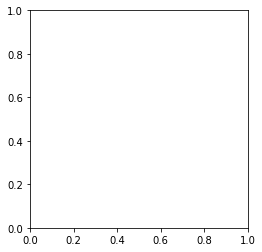

In [99]:
plt.imshow(X_train[0])